In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
weather_folder = '../ADS_Assgnment_1'

In [3]:
all_files = []

# Walk through all directories and files within weather_folder
for root, dirs, files in os.walk(weather_folder):
    for file in files:
        #filter csv fles
        if file.endswith(".csv"):
            #fullpath for file
            file_path = os.path.join(root, file)
            # Append the file path to the all_files list
            all_files.append(file_path)

In [4]:
all_files

['../ADS_Assgnment_1\\pokhara, nepal 2014-01-01 to 2015-12-31.csv',
 '../ADS_Assgnment_1\\Pokhara, Nepal 2016-01-01 to 2017-12-31.csv',
 '../ADS_Assgnment_1\\Pokhara, Nepal 2020-09-01 to 2023-04-30.csv',
 '../ADS_Assgnment_1\\pokhara, Nepal 2023-05-01 to 2024-10-31.csv',
 '../ADS_Assgnment_1\\Pokhara_Nepal_2018-01-01 to 2020-08-31.csv']

In [5]:
dfs = []

# Loop through each file in the directory
for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Combine all DataFrames into a single DataFrame
main_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
main_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"pokhara, nepal",2014-01-01,24.1,6.9,16.0,24.1,6.9,16.0,10.2,70.3,...,13.9,6,NaN,2014-01-01T07:00:55,2014-01-01T17:24:04,0.00,Rain,Clear conditions throughout the day with rain ...,rain,"44434099999,remote"
1,"pokhara, nepal",2014-01-02,21.8,7.7,14.3,21.8,7.7,14.3,8.4,69.8,...,15.1,7,NaN,2014-01-02T07:01:10,2014-01-02T17:24:46,0.03,Clear,Clear conditions throughout the day.,clear-day,"44434099999,remote"
2,"pokhara, nepal",2014-01-03,18.5,7.1,11.6,18.5,7.1,11.6,7.0,74.6,...,14.2,6,NaN,2014-01-03T07:01:24,2014-01-03T17:25:28,0.06,Clear,Clear conditions throughout the day.,clear-day,"44434099999,remote"
3,"pokhara, nepal",2014-01-04,20.5,8.8,13.2,20.5,8.8,13.2,6.4,65.1,...,14.3,6,NaN,2014-01-04T07:01:36,2014-01-04T17:26:11,0.09,Clear,Clear conditions throughout the day.,clear-day,"44434099999,remote"
4,"pokhara, nepal",2014-01-05,22.3,7.2,13.7,22.3,7.2,13.7,6.9,65.7,...,12.2,6,NaN,2014-01-05T07:01:47,2014-01-05T17:26:55,0.13,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"44434099999,remote"


In [6]:
main_df.shape

(3957, 33)

In [7]:
main_df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3957 non-null   object 
 1   datetime          3957 non-null   object 
 2   tempmax           3957 non-null   float64
 3   tempmin           3957 non-null   float64
 4   temp              3957 non-null   float64
 5   feelslikemax      3957 non-null   float64
 6   feelslikemin      3957 non-null   float64
 7   feelslike         3957 non-null   float64
 8   dew               3957 non-null   float64
 9   humidity          3957 non-null   float64
 10  precip            3957 non-null   float64
 11  precipprob        3957 non-null   int64  
 12  precipcover       3957 non-null   float64
 13  preciptype        2993 non-null   object 
 14  snow              3592 non-null   float64
 15  snowdepth         3592 non-null   float64
 16  windgust          3592 non-null   float64


In [10]:
main_df = main_df.sort_values('datetime')

In [11]:
main_df['datetime'] = pd.to_datetime(main_df['datetime'])

In [12]:
main_df['datetime']

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2978   2024-10-27
2979   2024-10-28
2980   2024-10-29
2981   2024-10-30
2982   2024-10-31
Name: datetime, Length: 3957, dtype: datetime64[ns]

In [13]:
imp_cols = ['datetime', 'temp', 'precip', 'preciptype']

In [14]:
df = main_df[imp_cols]

In [15]:
df.columns

Index(['datetime', 'temp', 'precip', 'preciptype'], dtype='object')

In [16]:
df.isnull().sum()

datetime        0
temp            0
precip          0
preciptype    964
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3957 entries, 0 to 2982
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    3957 non-null   datetime64[ns]
 1   temp        3957 non-null   float64       
 2   precip      3957 non-null   float64       
 3   preciptype  2993 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 154.6+ KB


In [18]:
df.describe()

,datetime,temp,precip
count,3957,3957.000000,3957.000000
mean,2019-06-02 00:00:00,18.838388,11.007051
min,2014-01-01 00:00:00,4.600000,0.000000
25%,2016-09-16 00:00:00,14.300000,0.100000
50%,2019-06-02 00:00:00,19.800000,3.000000
75%,2022-02-15 00:00:00,22.700000,11.500000
max,2024-10-31 00:00:00,34.900000,292.100000
std,NaN,5.748027,22.293976


In [19]:
df.set_index('datetime', inplace=True)

In [20]:
df

,temp,precip,preciptype
datetime,,,
2014-01-01,16.0,0.3,rain
2014-01-02,14.3,0.0,NaN
2014-01-03,11.6,0.0,NaN
2014-01-04,13.2,0.0,NaN
2014-01-05,13.7,0.0,NaN
...,...,...,...
2024-10-27,19.0,0.1,rain
2024-10-28,19.2,0.3,rain
2024-10-29,18.8,2.4,rain


In [21]:
df['preciptype'].unique()

array(['rain', nan, 'rain,snow'], dtype=object)

In [22]:
df['preciptype'].value_counts(dropna=False)

preciptype
rain         2954
NaN           964
rain,snow      39
Name: count, dtype: int64

In [23]:
nan_precip_values = df[df['preciptype'].isna()]['precip']
nan_precip_values.unique()

array([0.])

In [71]:
#Hence we cannot drop because it is nan for all precip 0 because there was not any precipitation. We can replace it by none

In [25]:
# df.dropna(inplace=True)

In [26]:
# df['preciptype'].value_counts(dropna=False)

In [27]:
df.loc[:, 'preciptype'] = df['preciptype'].fillna('None') #used .loc to remove warning

In [28]:
df['preciptype'].unique()

array(['rain', 'None', 'rain,snow'], dtype=object)

In [29]:
def plot_date_vs_temp_with_precip_size(df):
    # Define marker and color mapping for each precipitation type
    marker_map = {'rain': 'o', 'rain,snow': '+', 'None': '^'}
    color_map = {'rain': 'blue', 'rain,snow': 'red', 'None': 'gray'}
    
    # Plot each preciptype with customized marker, size, color, and transparency
    for precip_type, marker in marker_map.items():
        subset = df[df['preciptype'] == precip_type]
        
        # Set size for points: a minimum size for 'None' to make them visible
        size = subset['precip'].apply(lambda x: x if x > 0 else 10)  # Minimum size of 10 for 'None' with zero precip
        
        plt.scatter(
            subset.index, subset['temp'],  # Using datetime index directly on x-axis
            s=size,  # Size based on precipitation, with minimum for 'None'
            label=precip_type, marker=marker, alpha=0.6,
            color=color_map[precip_type]
        )
    
    # Add labels, legend, and title
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend(title='Preciptype')
    plt.title('Date vs Temperature with Precipitation as Size')
    plt.show()

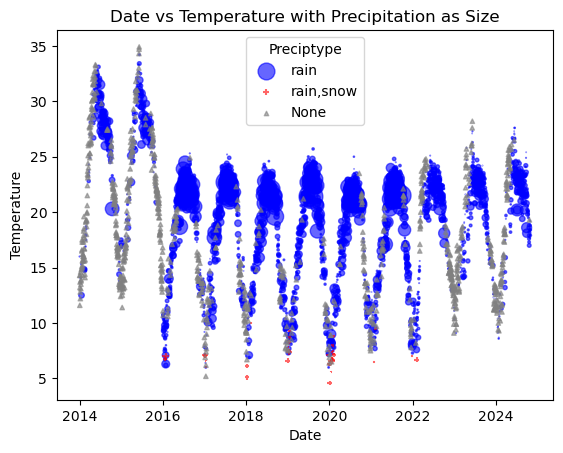

In [30]:
plot_date_vs_temp_with_precip_size(df)

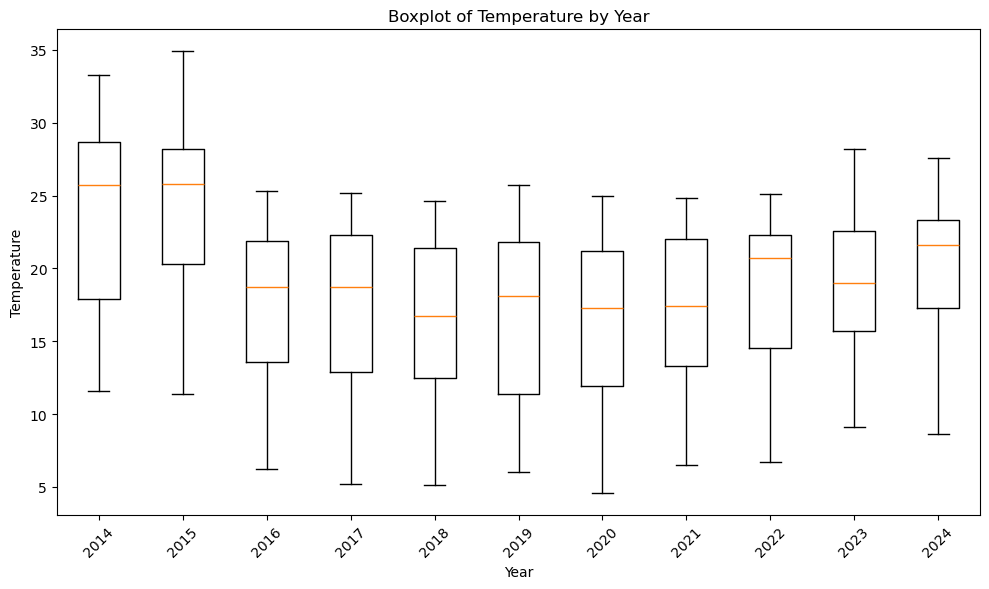

In [31]:
def plot_temperature_boxplot(df):
    plt.figure(figsize=(10, 6))
    
    # Create a boxplot for the temperature data
    plt.boxplot([df['temp'][df.index.year == year] for year in df.index.year.unique()], 
                labels=df.index.year.unique())
    
    plt.title('Boxplot of Temperature by Year')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_temperature_boxplot(df)


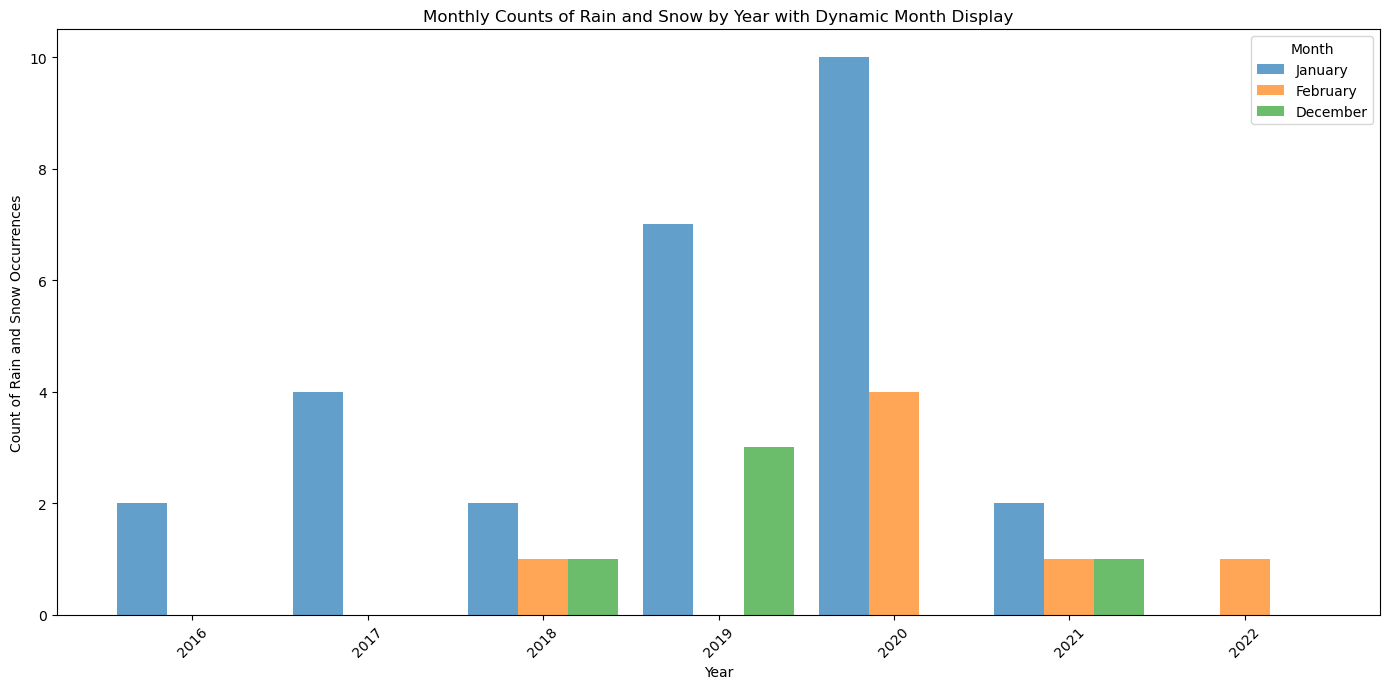

In [32]:
def plot_rain_snow_count_by_month_year(df):
    # Filter for 'rain,snow' precipitation type
    rain_snow_df = df[df['preciptype'] == 'rain,snow'].copy()
    
    # Extract year and month from the datetime index
    rain_snow_df['year'] = rain_snow_df.index.year
    rain_snow_df['month'] = rain_snow_df.index.month
    
    # Group by year and month, count occurrences, then pivot
    monthly_counts = rain_snow_df.groupby(['year', 'month']).size().unstack()
    
    # Drop columns with all NaN values to remove empty months
    monthly_counts = monthly_counts.dropna(axis=1, how='all')
    
    # Set up the bar width and positions
    bar_width = 0.15  # Increase bar width for better visibility
    total_years = len(monthly_counts.index)
    total_months = monthly_counts.shape[1]
    
    # Adjust the bar positions to reduce spacing between years
    bar_positions = np.arange(total_years) * (bar_width * (total_months + 0.5))  # Adjust spacing to reduce overlap
    
    # Plotting the grouped bar chart
    plt.figure(figsize=(14, 7))
    
    # Plot each available month with labeled month names
    for i, month in enumerate(monthly_counts.columns):
        month_name = calendar.month_name[month]  # Convert month number to month name
        plt.bar(
            bar_positions + i * bar_width,  # Offset for each month in the year group
            monthly_counts[month].fillna(0),  # Fill NaNs with 0 for plotting
            width=bar_width, label=month_name, alpha=0.7
        )
    
    # Customize the x-axis to show year labels with reduced gaps between years
    plt.xticks(bar_positions + bar_width * (total_months / 2 - 0.5), 
               monthly_counts.index, rotation=45)
    
    # Add labels, legend, and title
    plt.xlabel('Year')
    plt.ylabel('Count of Rain and Snow Occurrences')
    plt.title('Monthly Counts of Rain and Snow by Year with Dynamic Month Display')
    plt.legend(title='Month')
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_rain_snow_count_by_month_year(df)

